Análisis de los Datos Obtenidos de la Ejecución del Scraper a la Página de Técnología de Pycca

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pygwalker as pyg
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [4]:
path_csv = "../data/processed/cleaned_products.csv"
df = pd.read_csv(path_csv)

In [5]:
print("Registros/Columnas disponibles:")
df.shape

Registros/Columnas disponibles:


(115, 2)

In [24]:
def clean_duplicates(df):
    df = df.drop_duplicates(subset = "title")
    print(f"Cantidad actual de registros: {len(df)}")
    return df

In [25]:

if len(df) > df['title'].nunique():
    print(f"La cantidad de registros unicos es: {df['title'].nunique()}")
    df = clean_duplicates(df)

La cantidad de registros unicos es: 109
Cantidad actual de registros: 109


In [27]:
print("Muestra de 5 registros random:")
df.sample(5)

Muestra de 5 registros random:


title   price
72           Televisor Motorola 43TMKFHD Google Tv 43"  459.00
112     Timbre inteligente con cámara y conexión Wi-Fi  109.00
27            Audífonos Inalámbricos Maxell Halo EB-BT   30.99
17   Audífonos Inalámbricos Energy Sistem Urban 4 T...   44.99
74   Streaming Roku Express 4K Hdr Wifi Compatible ...  119.00

In [28]:
print("Resumen de los registros y tipo de datos de las columnas:")
df.info()

Resumen de los registros y tipo de datos de las columnas:
<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   109 non-null    object 
 1   price   109 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [29]:
# Funcion que permite categorizar en base al precio del producto, el poder adquisitivo del usuario.
def categorize_column_price(row):
    price = row['price']
    if price <= 300:
        return 'Low'
    elif price <= 600:
        return 'Medium'
    else:
        return 'High'

In [30]:
# Creación de nueva columna de categorización de productos en base a su precio.
df['category_price'] = df.apply(categorize_column_price, axis=1)

In [31]:
df.sample(5)

title   price category_price
101  Audífonos Sudio A1 Inalámbrico Estilo con canc...   70.09            Low
65                  Audífonos Alámbricos Maxell IN-225    5.99            Low
1    Audífonos Inalámbricos Energy Sistem Style 2 T...   47.04            Low
105    Audífonos Skullcandy Hesh Evo Wireless Over-Ear  159.00            Low
110     Audífonos Skullcandy Dime True Wireless In Ear   60.00            Low

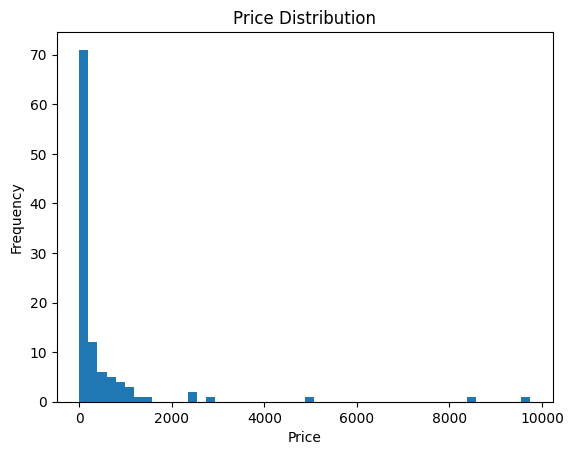

In [32]:
plt.hist(df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

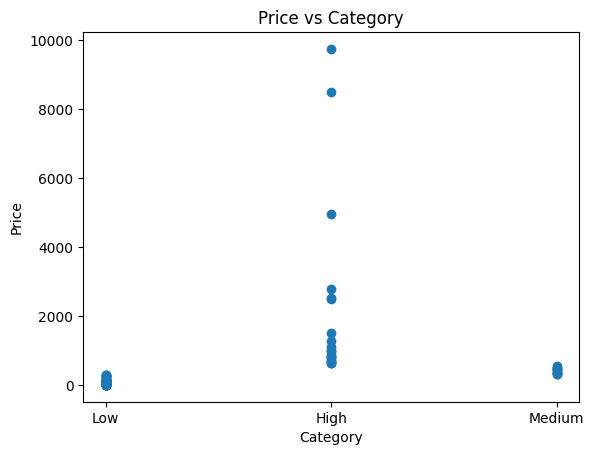

In [33]:
plt.scatter(df['category_price'], df['price'])
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Price vs Category')
plt.show()

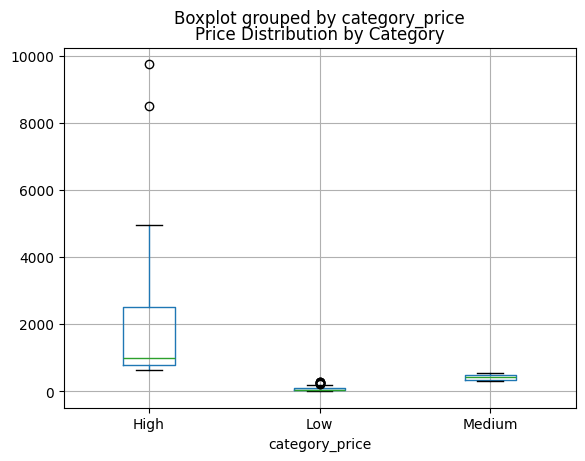

In [34]:
df.boxplot(column='price', by='category_price')
plt.title('Price Distribution by Category')
plt.show()

In [35]:
gwalker = pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-00061aa273296750ycuSXWBebZ9oDHvL" style="height: auto">\n    <head>…

In [37]:
# Guardo los cambios realizados dentro del analisis del notebook
df.to_csv("../data/processed/cleaned_products.csv", index=False)  

In [40]:
!jupyter nbconvert --to html "..\notebooks\analysis_data.ipynb"

[NbConvertApp] Converting notebook ..\notebooks\analysis_data.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 9656088 bytes to ..\notebooks\analysis_data.html
